In [1]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import src.utils as utils

from src.Data import Data
from src.Camera import Camera
from src.Plot import Plot
from src.VisualOdometry import VisualOdometry

import matplotlib.pyplot as plt

In [2]:
data = Data()
camera = Camera('data/camera.dat')

Number of world points NOT added: 0
Number of world points triangulated pre: 115
Number of world points NOT added: 0
Number of points in measurement 0: 127
Number of points in measurement 1: 124
Number of points in measurement 0 and not in measurement 1:  12
Number of points in measurement 1 and not in measurement 0:  9
Number of matches: 115
Number of world points triangulated post: 115
Estimated w_T_c:
 [[ 1.  0.  0.  0.]
 [-0.  1.  0.  0.]
 [-0. -0.  1.  1.]
 [ 0.  0.  0.  1.]]
[14.55773075 -3.74776004 11.96502345]
[ 4.73179726 -3.73953996  5.92767759]
[-33.28544316  -8.4978926   22.75192693]
[-1.06712743 -9.41493112 13.09106187]
[23.88736344 -2.98484942 21.67683211]
[-14.24534182  -0.36981556   9.82605899]
[18.63007042 -7.68111285 13.29488874]
[-1.81354293 -6.64617984 18.07266183]
[-9.71452458 -5.54036179 12.05786025]
[-19.94904243  -3.44272056  14.15599364]
[20.1520927  -6.17090968 23.18309004]
[27.39805565 -4.70328828 20.87791532]
[ 5.65279402 -4.60899828 12.48221146]
[15.5606999

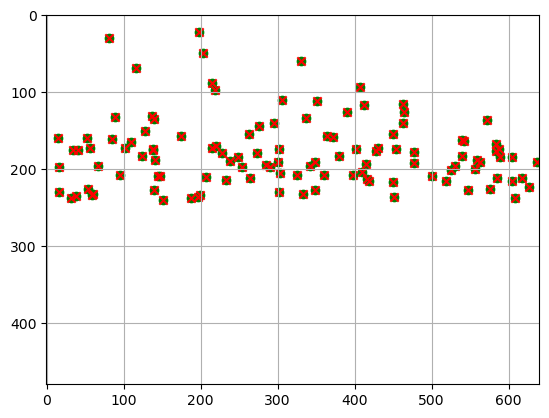

In [3]:
vo = VisualOdometry(camera, data)
vo.initialize()
index = 1

measurements = data.get_measurement_points(index)
matches = vo.data_association(measurements, vo.get_map())
image_points = matches['points_1']
world_points = matches['points_2']
appearances = matches['appearances']

w_T_c = vo.get_trajectory()['poses'][index]
print('Estimated w_T_c:\n', np.round(w_T_c, 2))

projected_points = []
for i in range(len(world_points)):
    proj_image_point_hom, proj_image_point = camera.project_point(world_points[i], w_T_c)
    
    if proj_image_point_hom is None or proj_image_point is None:
        continue    
    projected_points.append(proj_image_point)

fig, ax = plt.subplots()
ax.imshow(np.ones((480, 640, 3)))
ax.scatter([point[0] for point in image_points], [point[1] for point in image_points], color='green', marker='o')
ax.scatter([point[0] for point in projected_points], [point[1] for point in projected_points], color='red', marker='x')
plt.grid()
plt.show()

In [4]:
pose_0 = vo.get_trajectory()['poses'][0]
pose_1 = vo.get_trajectory()['poses'][1]

world_points = vo.get_map()['points']
print('Number of world points: ', len(world_points))

x_coords = [point[0] for point in world_points]
y_coords = [point[1] for point in world_points]
z_coords = [point[2] for point in world_points]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=2)))

fig.add_trace(go.Scatter3d(x=[pose_0[0, 3]], y=[pose_0[1, 3]], z=[pose_0[2, 3]], mode='markers', marker=dict(size=4, color='red')))
fig.add_trace(go.Scatter3d(x=[pose_1[0, 3]], y=[pose_1[1, 3]], z=[pose_1[2, 3]], mode='markers', marker=dict(size=4, color='blue')))
fig.add_trace(go.Scatter3d(x=[pose_0[0, 3], pose_1[0, 3]], y=[pose_0[1, 3], pose_1[1, 3]], z=[pose_0[2, 3], pose_1[2, 3],], mode='lines', line=dict(color='black', width=2)))

fig.show()

Number of world points:  115


In [5]:
map = vo.get_map()
points = map['points']

C = camera.get_camera_transform()
points_hom = np.hstack((points, np.ones((len(points), 1))))
points_hom = np.dot(C, points_hom.T).T
points = points_hom[:, :3]

appearances = map['appearances']
set_1 = {'points': points, 'appearances': appearances}

set_2 = {'points': [], 'appearances': []}
world = data.get_world()
for i in range(len(world)):
    landmark_position = world[i]['landmark_position']
    landmark_appearances = world[i]['landmark_appearance']
    set_2['points'].append(landmark_position)
    set_2['appearances'].append(landmark_appearances)

matches = vo.data_association(set_1, set_2)
map_points = matches['points_1']
world_points = matches['points_2']

x_coords = [point[0]*0.208 for point in map_points]
y_coords = [point[1]*0.208 for point in map_points]
z_coords = [point[2]*0.208 for point in map_points]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=2, color='blue')))

x_coords = [point[0] for point in world_points]
y_coords = [point[1] for point in world_points]
z_coords = [point[2] for point in world_points]

fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=2, color='red')))
fig.show()

In [6]:
for i in range(2,121):
    vo.one_step(i)

Number of world points triangulated pre: 117
Number of world points NOT added: 108
Number of points in measurement 0: 124
Number of points in measurement 1: 123
Number of points in measurement 0 and not in measurement 1:  6
Number of points in measurement 1 and not in measurement 0:  7
Number of matches 2D:  117
Number of world points triangulated post: 117
Number of world points in 1: 115
Number of world points in 2: 124
Number of world points added: 9

Number of world points triangulated pre: 118
Number of world points NOT added: 112
Number of points in measurement 0: 123
Number of points in measurement 1: 123
Number of points in measurement 0 and not in measurement 1:  5
Number of points in measurement 1 and not in measurement 0:  5
Number of matches 2D:  118
Number of world points triangulated post: 118
Number of world points in 1: 124
Number of world points in 2: 130
Number of world points added: 6

Number of world points triangulated pre: 104
Number of world points NOT added: 99


In [7]:
estimated_trajectory = vo.get_trajectory()
gt_trajectory = data.get_trajectory()

C = camera.get_camera_transform()
C_inv = np.linalg.inv(C)    

estimated_poses = estimated_trajectory['poses']
estimated_poses_in_world = [] 

MAX_FRAMES = 121
for i in range(len(estimated_poses)):
    if i == MAX_FRAMES: break
    pose = estimated_poses[i]
    pose_in_world = pose @ C_inv
    estimated_poses_in_world.append(pose_in_world)
    

estimated_positions = []
estimated_positions_in_world = [] 
for i in range(len(estimated_poses_in_world)):
    estimated_positions.append(estimated_poses[i][:3, 3]*0.208)
    estimated_positions_in_world.append(estimated_poses_in_world[i][:3, 3]*0.208)

gt_poses = []
gt_positions = []
for i in range(121):
    if i == MAX_FRAMES: break
    x_gt, y_gt, theta_gt = gt_trajectory[i]['ground_truth_pose']
    gt_poses.append(np.array([x_gt, y_gt, 0, 0, 0, theta_gt]))
    gt_positions.append(np.array([x_gt, y_gt, 0]))
    
fig = go.Figure()
gt_x_coords = [position[0] for position in gt_positions]
gt_y_coords = [position[1] for position in gt_positions]
gt_z_coords = [position[2] for position in gt_positions]
fig.add_trace(go.Scatter3d(x=gt_x_coords, y=gt_y_coords, z=gt_z_coords, mode='lines', name='GT trajectory', line=dict(color='green')))

estimated_x_coords = [position[0] for position in estimated_positions]
estimated_y_coords = [position[1] for position in estimated_positions]
estimated_z_coords = [position[2] for position in estimated_positions]
fig.add_trace(go.Scatter3d(x=estimated_x_coords, y=estimated_y_coords, z=estimated_z_coords, mode='lines', name='Estimated trajectory', line=dict(color='red')))

estimated_x_coords_in_world = [position[0] for position in estimated_positions_in_world]
estimated_y_coords_in_world = [position[1] for position in estimated_positions_in_world]
estimated_z_coords_in_world = [position[2] for position in estimated_positions_in_world]
#fig.add_trace(go.Scatter3d(x=estimated_x_coords_in_world, y=estimated_y_coords_in_world, z=estimated_z_coords_in_world, mode='lines', name='Estimated trajectory in world frame', line=dict(color='blue')))

fig.show()

[23.19242711 -5.38178273 23.75670796]
[ 5.91527901  4.37607708 16.89654974]
[14.57289377 -9.4146154  34.83156384]
[ 4.9975311   2.23064149 16.07074317]
[24.12718427 -0.36427087 44.47243987]
[ 6.5284968   0.10519213 11.2007755 ]
[ 2.34082639  0.61326058 12.25422238]
[17.80333234 -6.64875783 30.96455511]
[21.41941545 -5.53729919 40.21197557]
[ 6.01484074 -0.74505732 14.87965485]
[31.25071446 -3.43845647 43.74581727]
[ 4.81062315 -2.80262105 18.89668378]
[17.02763886 -3.75106418 34.29769143]
[ 2.763719    1.31789159 15.16376509]
[ 6.51688931  0.03528743 10.80139362]
[34.01614719 -0.7072448  43.84765061]
[ 2.07556494  0.0767192  11.79207436]
[38.69377551 -0.53187594 44.77680892]
[21.05358578 -2.96951669 41.98460236]
[24.1742046  -7.95104233 28.75356729]
[28.65111194 -6.6996454  30.68139901]
[18.60259222 -4.0819183  43.02673762]
[35.72421421 -7.70575452 38.65285599]
[20.94054293 -9.00618891 42.94193617]
[27.89440819 -7.79888171 43.07253874]
[17.99821954 -4.12180354 39.44673261]
[33.2978594 

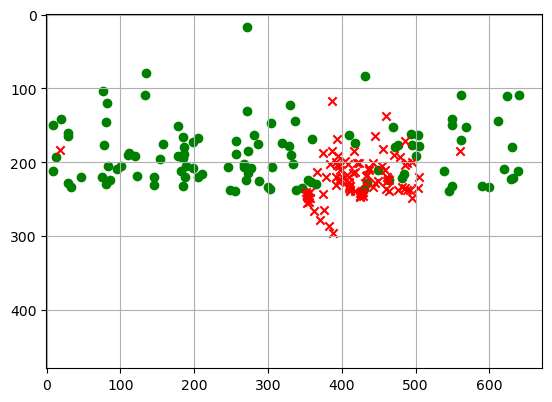

In [8]:
index = 100

measurements = data.get_measurement_points(index)
matches = vo.data_association(measurements, vo.get_map())
image_points = matches['points_1']
world_points = matches['points_2']
appearances = matches['appearances']

estimated_w_T_c = vo.get_trajectory()['poses'][index]

projected_points = []
for i in range(len(world_points)):
    proj_image_point_hom, proj_image_point = camera.project_point(world_points[i], estimated_w_T_c)
    if proj_image_point_hom is None or proj_image_point is None:
        continue
    projected_points.append(proj_image_point)

fig, ax = plt.subplots()
ax.imshow(np.ones((480, 640, 3)))
ax.scatter([point[0] for point in image_points], [point[1] for point in image_points], color='green', marker='o')
ax.scatter([point[0] for point in projected_points], [point[1] for point in projected_points], color='red', marker='x')
plt.grid()
plt.show()

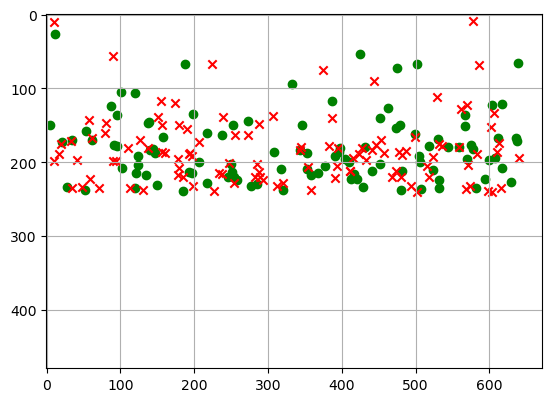

In [9]:
index = 17

prev_measurements = data.get_measurement_points(index-1)
measurements = data.get_measurement_points(index)

prev_image_points = []
for i in range(len(prev_measurements['points'])):
    prev_image_points.append(prev_measurements['points'][i])

image_points = []
for i in range(len(measurements['points'])):
    image_points.append(measurements['points'][i])

fig, ax = plt.subplots()
ax.imshow(np.ones((480, 640, 3)))
ax.scatter([point[0] for point in prev_image_points], [point[1] for point in prev_image_points], color='green', marker='o')
ax.scatter([point[0] for point in image_points], [point[1] for point in image_points], color='red', marker='x')
plt.grid()
plt.show()

In [13]:
index = 120

pose = vo.get_trajectory()['poses'][index]
print('Estimated w_T_c:\n', np.round(pose, 2))
map = vo.get_trajectory()['world_points'][index]
points = map['points']
C = camera.get_camera_transform()
points_hom = np.hstack((points, np.ones((len(points), 1))))
points_hom = np.dot(C, points_hom.T).T
points = points_hom[:, :3]
appearances = map['appearances']
set_1 = {'points': points, 'appearances': appearances}
set_2 = {'points': [], 'appearances': []}
world = data.get_world()
for i in range(len(world)):
    landmark_position = world[i]['landmark_position']
    landmark_appearances = world[i]['landmark_appearance']
    set_2['points'].append(landmark_position)
    set_2['appearances'].append(landmark_appearances)
matches = vo.data_association(set_1, set_2)
map_points = matches['points_1']
world_points = matches['points_2']
fig = go.Figure()
x_coords = [point[0]*0.208 for point in map_points]
y_coords = [point[1]*0.208 for point in map_points]
z_coords = [point[2]*0.208 for point in map_points]
fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=2, color='blue')))
x_coords = [point[0] for point in world_points]
y_coords = [point[1] for point in world_points]
z_coords = [point[2] for point in world_points]
fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=2, color='red')))
fig.show()

Estimated w_T_c:
 [[-9.900e-01 -0.000e+00  1.500e-01  2.331e+01]
 [-0.000e+00  1.000e+00 -0.000e+00  2.000e-02]
 [-1.500e-01 -0.000e+00 -9.900e-01  1.825e+01]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]


In [11]:
fig = go.Figure()
world_points = vo.get_map()['points']

world_points_hom = np.hstack((world_points, np.ones((len(world_points), 1))))
C = camera.get_camera_transform()
world_points = (C @ world_points_hom.T).T
print('Number of world points: ', len(world_points))

x_coords = [point[0]*0.208 for point in world_points]
y_coords = [point[1]*0.208 for point in world_points]
z_coords = [point[2]*0.208 for point in world_points]

fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=1)))


points = []
world_points = data.get_world()
for i in range(len(world_points)):
    landmark_position = world_points[i]['landmark_position']   
    points.append(landmark_position)

x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]
z_coords = [point[2] for point in points]

fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=1, color='red')))



fig.show()

Number of world points:  490
